Epoch:0,训练平均损失:2.3015, 训练准确度:0.083
Epoch:1,训练平均损失:1.0445, 训练准确度:0.615
Epoch:2,训练平均损失:0.6959, 训练准确度:0.802
Epoch:3,训练平均损失:0.5954, 训练准确度:0.833
Epoch:4,训练平均损失:0.4687, 训练准确度:0.802
Epoch:5,训练平均损失:0.4239, 训练准确度:0.865
Epoch:6,训练平均损失:0.4567, 训练准确度:0.844
Epoch:7,训练平均损失:0.1836, 训练准确度:0.958
Epoch:8,训练平均损失:0.4137, 训练准确度:0.812
Epoch:9,训练平均损失:0.3340, 训练准确度:0.865
Epoch:10,训练平均损失:0.3194, 训练准确度:0.865
Epoch:11,训练平均损失:0.2473, 训练准确度:0.917
Epoch:12,训练平均损失:0.2496, 训练准确度:0.927
Epoch:13,训练平均损失:0.2322, 训练准确度:0.938
Epoch:14,训练平均损失:0.2824, 训练准确度:0.896
Epoch:15,训练平均损失:0.2684, 训练准确度:0.896
Epoch:16,训练平均损失:0.2748, 训练准确度:0.885
Epoch:17,训练平均损失:0.2877, 训练准确度:0.906
Epoch:18,训练平均损失:0.2607, 训练准确度:0.875
Epoch:19,训练平均损失:0.2092, 训练准确度:0.906
Epoch:20,训练平均损失:0.1763, 训练准确度:0.948
Epoch:21,训练平均损失:0.2697, 训练准确度:0.906
Epoch:22,训练平均损失:0.2211, 训练准确度:0.875
Epoch:23,训练平均损失:0.2179, 训练准确度:0.927
Epoch:24,训练平均损失:0.1622, 训练准确度:0.906
Epoch:25,训练平均损失:0.1210, 训练准确度:0.958
Epoch:26,训练平均损失:0.1714, 训练准确度:0.948
Epoch:27,训练平均损失:0.2034, 训练准确度:0.938
Ep

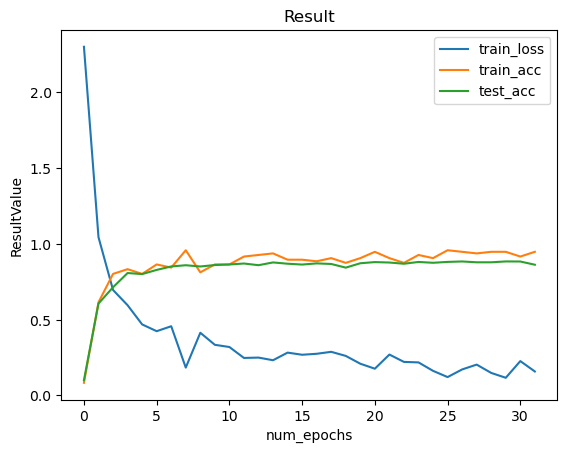

/home/lindenbaum/Documents/Python/DeepLearning/DeepLearning/DeepLearning Fundamentals/st_train.py:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axes = plt.subplots(1, n, figsize=(8, 8))


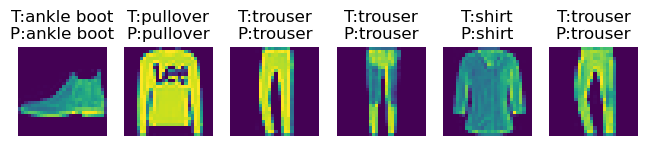

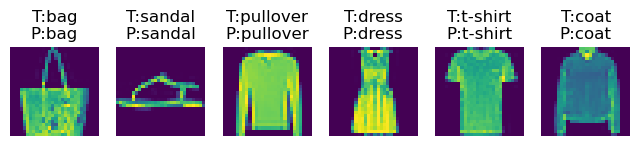

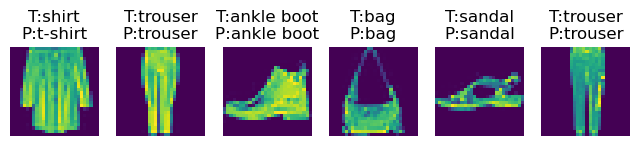

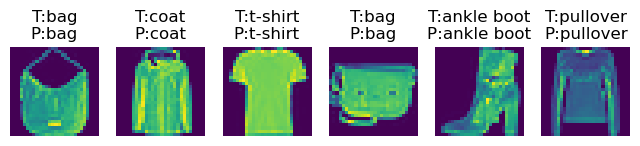

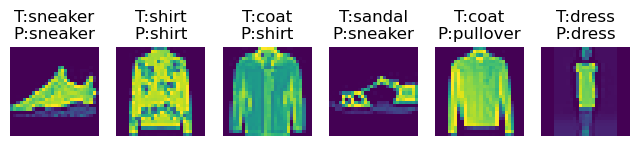

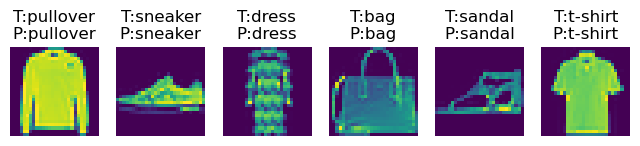

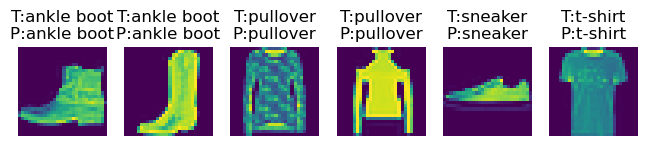

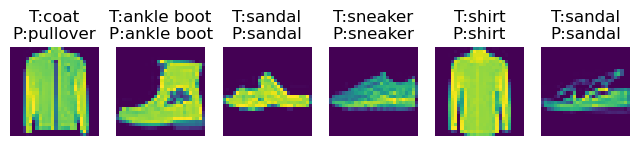

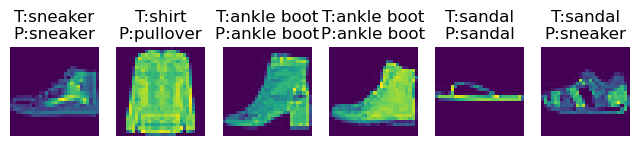

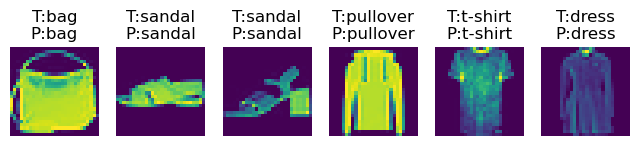

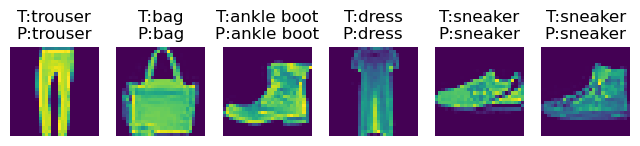

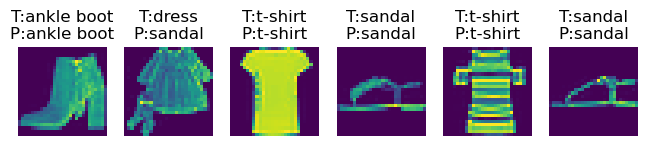

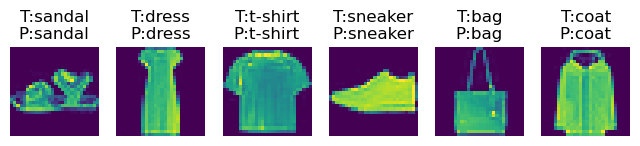

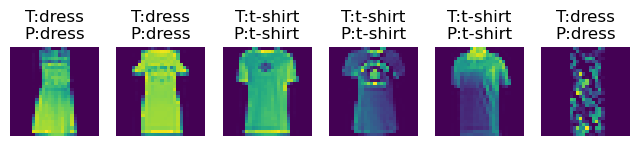

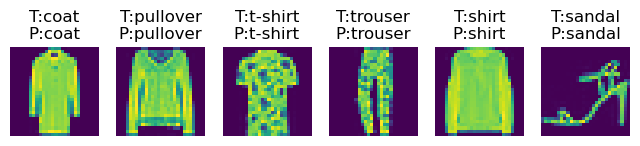

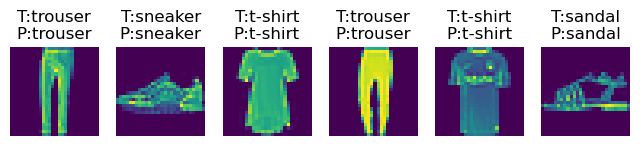

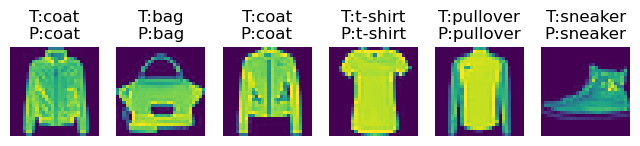

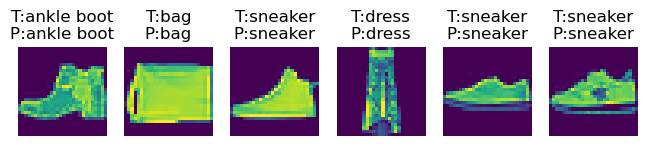

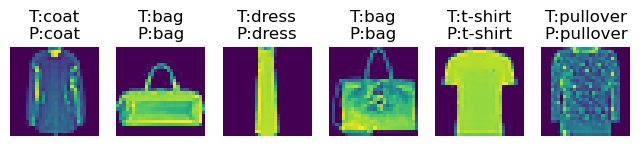

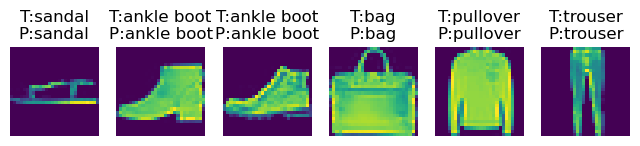

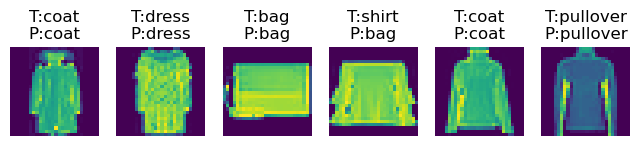

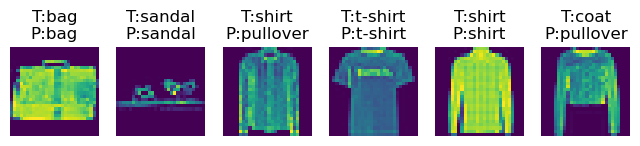

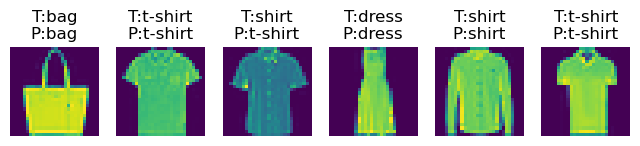

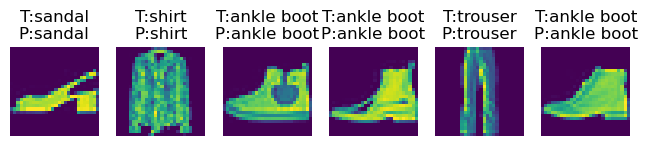

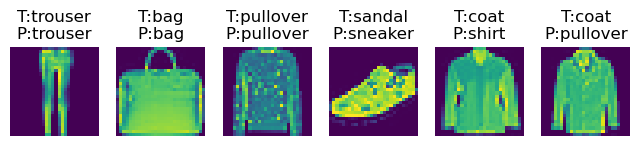

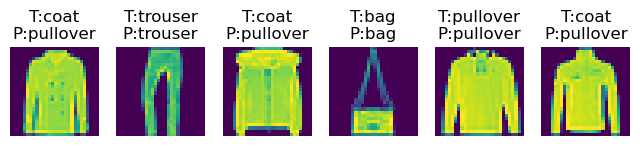

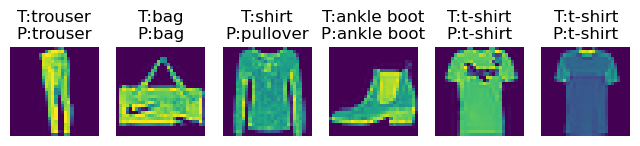

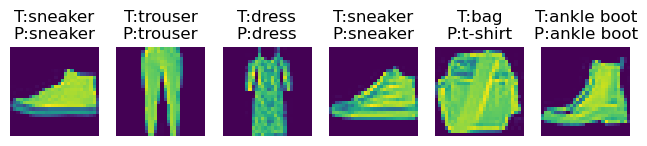

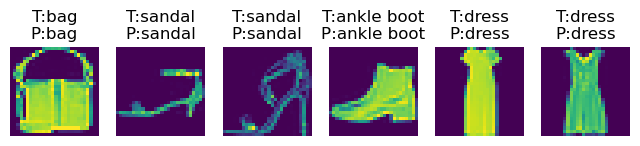

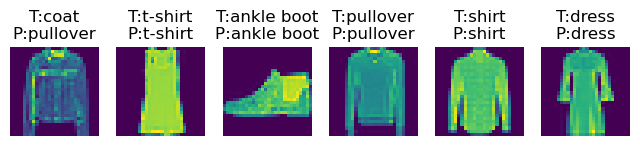

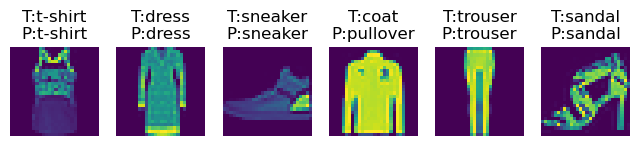

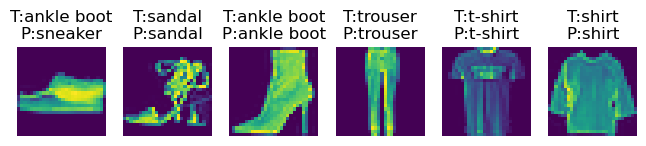

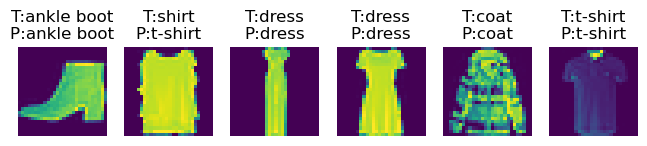

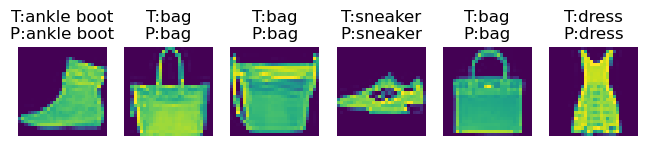

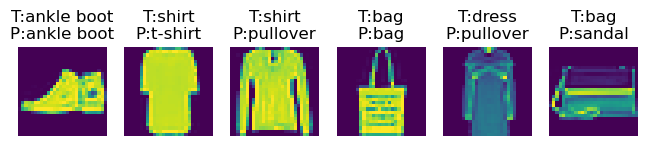

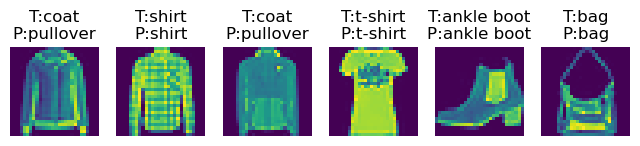

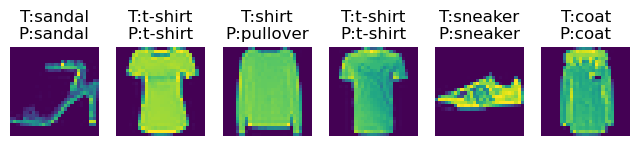

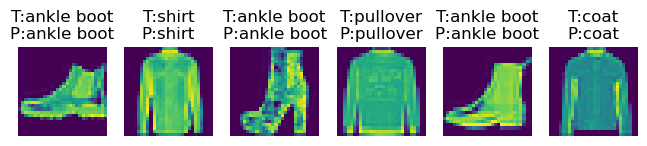

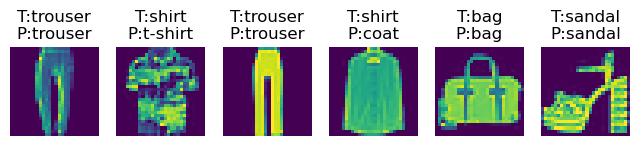

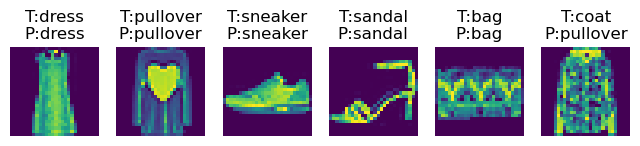

In [1]:
from st_train import *
import sys
import os
import torch
import torchvision
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
from torchvision import transforms
num_inputs , num_outputs , num_hiddens= 784, 10 , 256 #定义输入特征数量 输出类别数量 隐藏层中的隐藏单元数
num_epochs = 32
learning_rate = 0.1
batch_size = 256
train_set, test_set =(
            data.DataLoader(torchvision.datasets.FashionMNIST(root='./data', train=True,
                                                                        transform=transforms.ToTensor(),
                                                                        download=True),
                            num_workers=16, batch_size=batch_size, shuffle=True),
            data.DataLoader(torchvision.datasets.FashionMNIST(root='./data', train=False,
                                                                        transform=transforms.ToTensor(),
                                                                        download=True),
                            num_workers=16, batch_size=batch_size, shuffle=False))
"""
定义网络:
先通过展平层
之后是第一层隐藏层,有256个隐藏单元 (这也是一个全连接层)
每通过一个隐藏层,使用一次激活函数ReLU()
最后一个输出层输出,有10个单元 (是一个全连接层)
"""
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(),
    nn.Linear(256,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,10)
)
def weights_init(m): # 初始化权重矩阵
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, std=0.01)
net.apply(weights_init)
loss_function = nn.CrossEntropyLoss(reduction='none')
updater = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.7)
Res = ResVisualization(("train_loss", "train_acc", "test_acc"), num_epochs) # 结果绘图
train(net, train_set, test_set, loss_function, num_epochs, updater, Res)
Res.plot_res()
std_prediction(net, test_set, 6)